# Practical on Convolutional Neural Networks

During this practical you will learn how to develop and train a convolutional neural network for recognising hand-written digits provided by the MNIST dataset (you can read more here:https://en.wikipedia.org/wiki/MNIST_database), using the keras library: https://keras.io/ 


In [ ]:
#import libraries
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

#The dataset can be downloaded and loaded through the keras library as follows:
#(the first time might take longer because the dataset will be downloaded first)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Visualise the data 

To view the four first examples of the dataset, we will you matplotlib. The command %matplotlib inline tells your jupyter notebook to show the image, if you forget it the images won't show on your browser. 

The cryptic arguments (2,2,1), (2,2,2), (2,2,3), and (2,2,4) below correspond to top left, top right, bottom left and bottom right. 

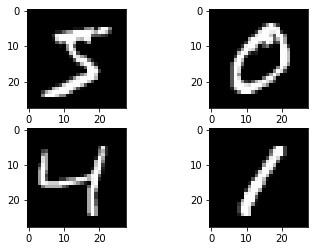

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,4)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

#show the plot
plt.show()

# 1. Data preprocessing

After we load the MNIST dataset, we will need to reshape it so that it is suitable for training a CNN. 
In Keras, the layers used for two-dimensional convolutions expect pixel values with the follwong dimensions:

[samples,width,height,channels]

Note that because the MNIST data is in grey scale, we only have one channel, i.e the channel dimension is 1. If we had RGB images, the channels would have a value of 3, and it would be like having 3 image inputs for every color image.

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

### Scaling 

For grayscale images, the pixel values are between 0 and 255. When using neural networks, it is common practice to scale rhe input values by dividing each value by the maximum of 255, so they can take values between 0-1 (so they are more similar). This process is called normalisation. 

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

### Encoding of outputs

Finally, the output variable is an integer from 0 to 9. This is a multi-class classification problem (as opposed to binary that we only predict between two classes). Therefore, we will encode the outputs using one-hot encoding as follows: 

Digit 0 ---> [0,0,0,0,0,0,0,0,0]<br>
Digit 1 ---> [1.0,0,0,0,0,0,0,0]<br>
Digit 2 ---> [0,1,0,0,0,0,0,0,0]<br>
...<br>
Digit 9 ---> [0,0,0,0,0,0,0,0,1]

In [ ]:
# one-hot encoding for outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# 2. Defining a CNN model

The function below defines a sequential model (this is how keras defines a CNN). Our models has aconvolutional layer, with a filter 5x5, and ReLU as an activation function (you can define more arguments, see here: https://keras.io/layers/convolutional/). 

The CNN also includes a maxpooling layer with strides 2x2, a dropout layer (randomly sets a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting) and two fully-connected layers (which are denoted as Dense in keras).

The model will be trained by using stochastic gradients descent ("sgd"), and it will use MSE as a loss function. 

In [ ]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(strides=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    #Compile/train model
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
    return model


In [ ]:
#define the model
model = cnn_model()
model.summary()
#train the model
training = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=200)
#Evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 592,074
Trainable params: 592,074
Non-trainable params: 0
________________________________________________

### Recap

- A training set is the set of instances used to train the model, as we discussed in previous units. Based on this data, the models learns its weights. 
- A validation set is a set of data (different data than this in the training set) which is used during training to validate our model. The validation set gives us information and help us adjust the hyperparameters. It is not used for direct training. Note that the loss calculated for the validation set is not backpropagated. The validation set helps us know that the model is not overfitting. 
- A test set is the set of data used for evaluation after the model has been trained as we saw in previous units. This data includes different instances to the training and validation set. 

### Exercise 1: 

Check the keras documentation here https://keras.io/api/losses/ regarding losses. Which loss function is appropriate for multi-class clasiffication? Ammend the network above to include your chosen loss function. 

### Exercise 2: 

A. Define a new function "deep_cnn_model", that includes three convolutional layers, with maxpooling in between them. So the resultant model should have the following layers: conv2d, maxpooling, conv2d, maxpooling, conv2d, maxpooling, dropout, flatten, (one or more) fully connected layers.  <br>
B. Evaluate your model as above. Which of the two models is more accurate? <br>
C. Finally, try changing the loss function, the optimizer, strides, epochs etc. (check keras documentation for examples). Does your model perform better? 

### Exercise 3: 
Train the model created in Exercise 1 by including a vaildation dataset which is **different** to the test set. For instance, use 10% of the training set as validation set. 

Hint: You can do this in keras by using the validation_split function as an argument in the fit function: validation_split = 0.1 


### Exercise 4:

Use early stopping while training, instead of manually choosing the number of epochs. What do you observe? 

Hint: https://keras.io/api/callbacks/early_stopping/ 

### Exercise 5: 

How would you calculate precision, recall and f-score? Note that Keras does not offer built-in functions for these metrics. 

Answer: 